# See if ```sklearn```s DecisionTree-Estimators are Applicable as Models in an Ensemble

<hr/>

## Prerequisites

#### Imports

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tensorflow as tf

from ensemble_uncertainties.evaluators.regression_evaluator import RegressionEvaluator
from ensemble_uncertainties.utils.ad_assessment import rmses_frac
from ensemble_uncertainties.utils.plotting import plot_r2, plot_confidence

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#### Constants

In [2]:
RANDOM_SEED = 0
N_SPLITS = 2
TASK = 'regression'
PLOT_FOLDER = './plots/decision_tree_quality/'

#### Settings

In [3]:
mpl.rcParams['figure.dpi'] = 200

#### Functions

In [4]:
def load_data_set(name, descriptor):
    """Loads X and y as dataframes from data folder."""
    folder = f'../../../data/featurized/{TASK}/{name}/'
    X_file = f'{folder}{name}_{descriptor}.csv'
    y_file = f'{folder}{name}_y.csv'
    X = pd.read_csv(X_file, sep=';').set_index('id')
    y = pd.read_csv(y_file, sep=';').set_index('id')
    return X, y


def auco_area(evaluator):
    """Computes the area under the confidence-oracle error"""
    y = evaluator.y['y']
    resids = evaluator.test_ensemble_preds['resid']
    uncertainties = evaluator.test_ensemble_preds['sdep']
    oracle_rmses, measure_rmses = rmses_frac(resids, uncertainties)
    area = sum([m - o for o, m in zip(oracle_rmses, measure_rmses)])
    return area

<hr/>

## Evaluate

Try out small test setting (n=5)

In [5]:
tetrah_cddd, tetrah_y = load_data_set('tetrahymena', 'cddd')
dt_5_evaluator = RegressionEvaluator(model=DecisionTreeRegressor(), repetitions=5, n_splits=2, verbose=False)
dt_5_evaluator.perform(tetrah_cddd, tetrah_y)

100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


Show predictive performance including degree of overfitting and uncertainty performance

AUCO: 370.527


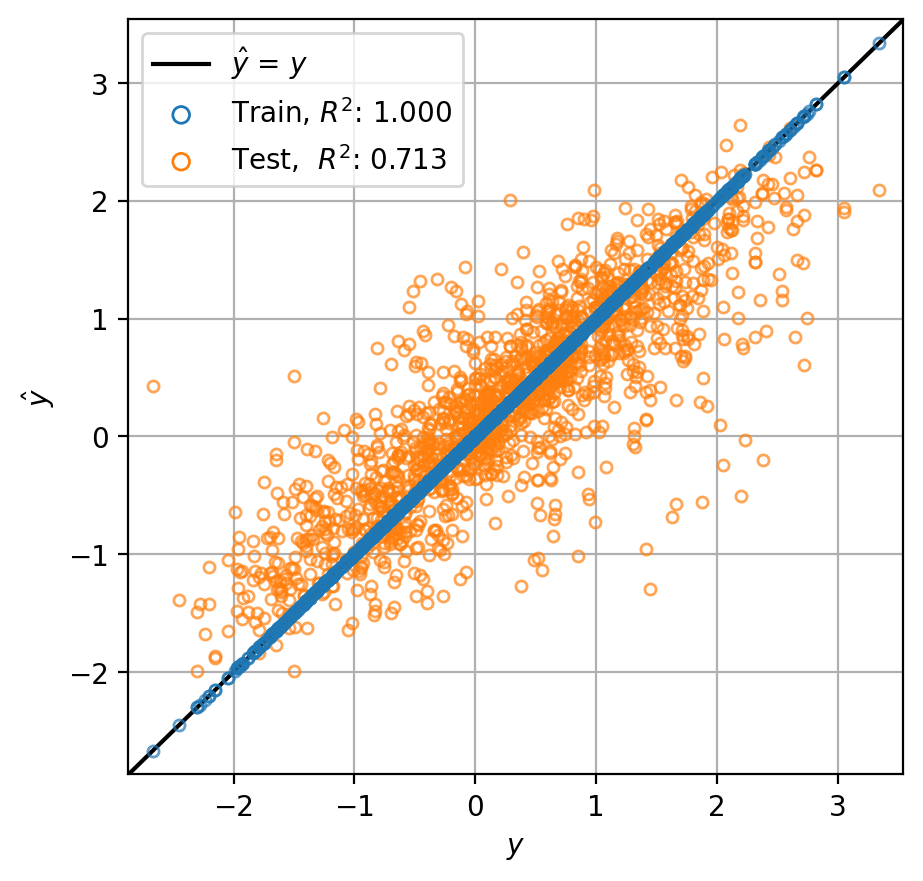

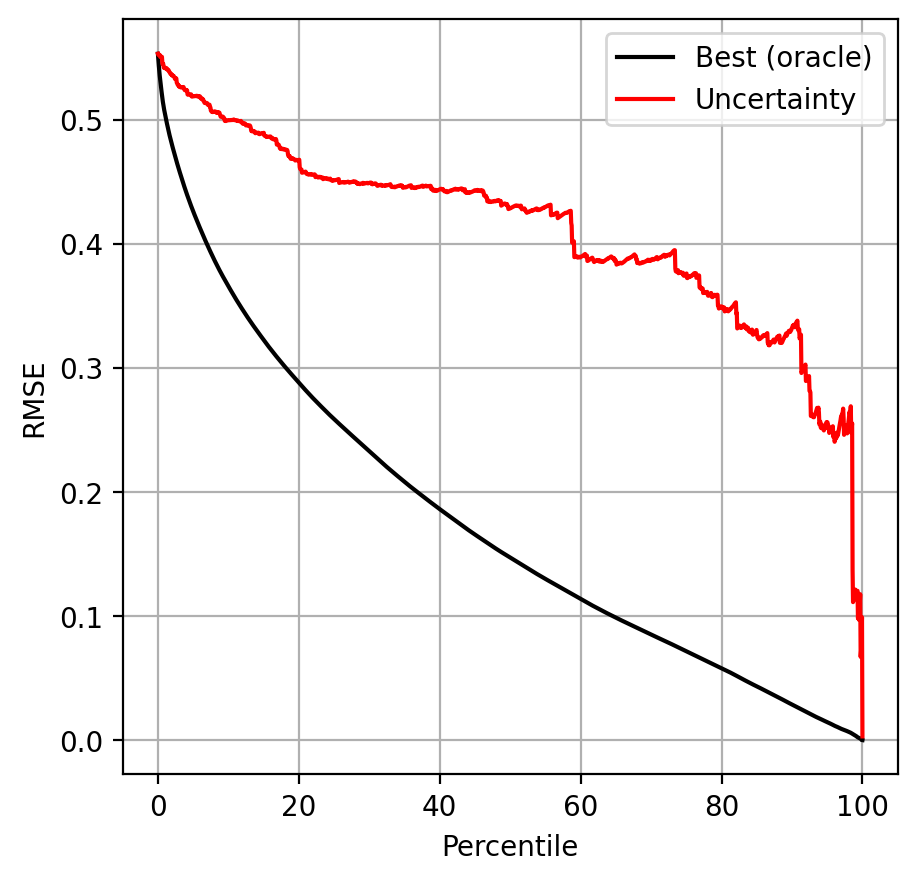

In [6]:
plot_r2(dt_5_evaluator)
plot_confidence(dt_5_evaluator)
print(f'AUCO: {auco_area(dt_5_evaluator):.3f}')

Compare to RandomForestRegressor

100%|██████████| 5/5 [01:20<00:00, 16.11s/it]


AUCO: 323.425


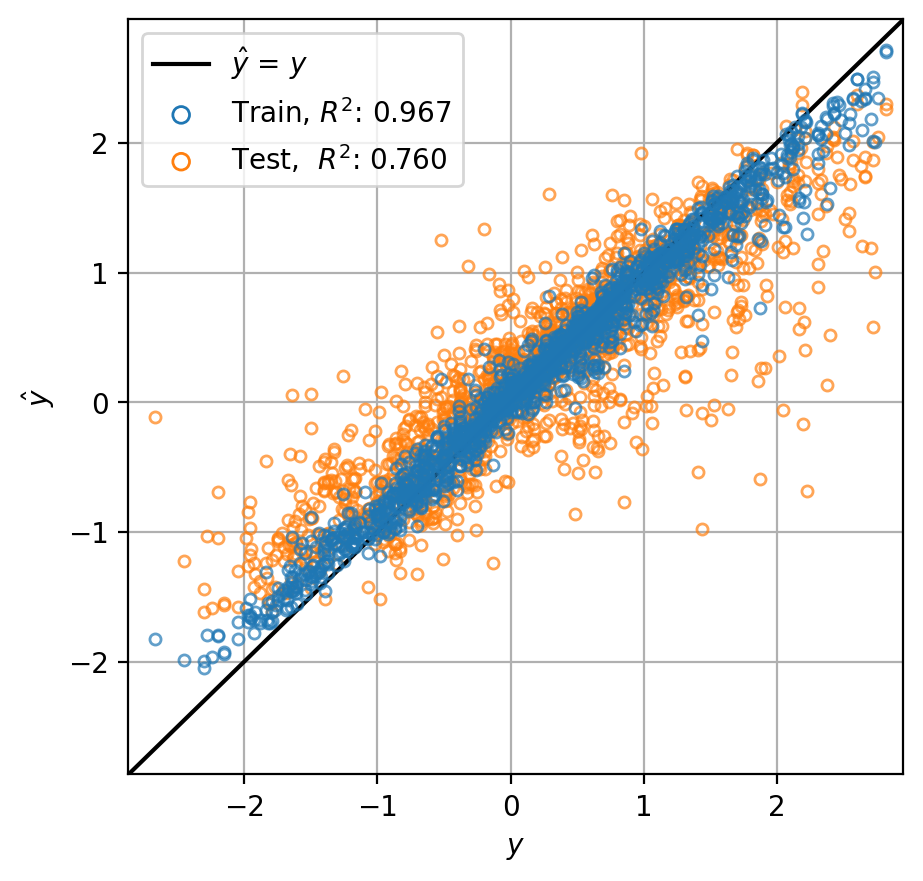

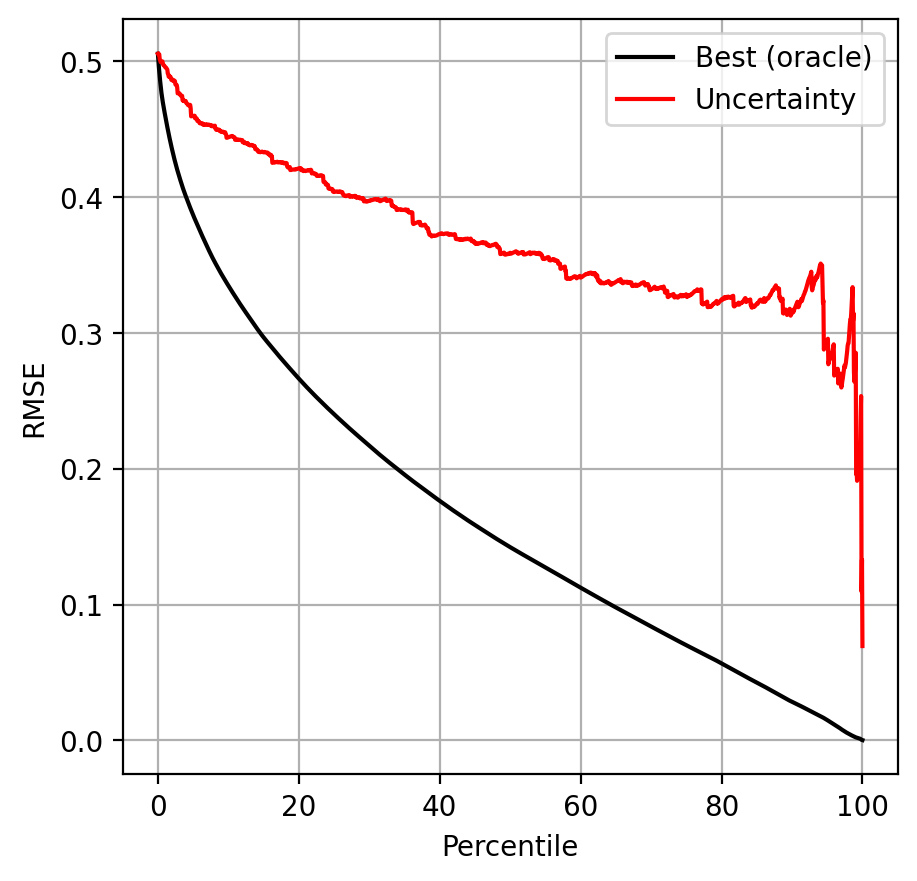

In [7]:
rf_5_evaluator = RegressionEvaluator(model=RandomForestRegressor(), repetitions=5, n_splits=2, verbose=False)
rf_5_evaluator.perform(tetrah_cddd, tetrah_y)
plot_r2(rf_5_evaluator)
plot_confidence(rf_5_evaluator)
print(f'AUCO: {auco_area(rf_5_evaluator):.3f}')

<hr/>

Try out with n=100, DecisionTreeRegressor

100%|██████████| 100/100 [00:33<00:00,  2.96it/s]


AUCO: 215.891


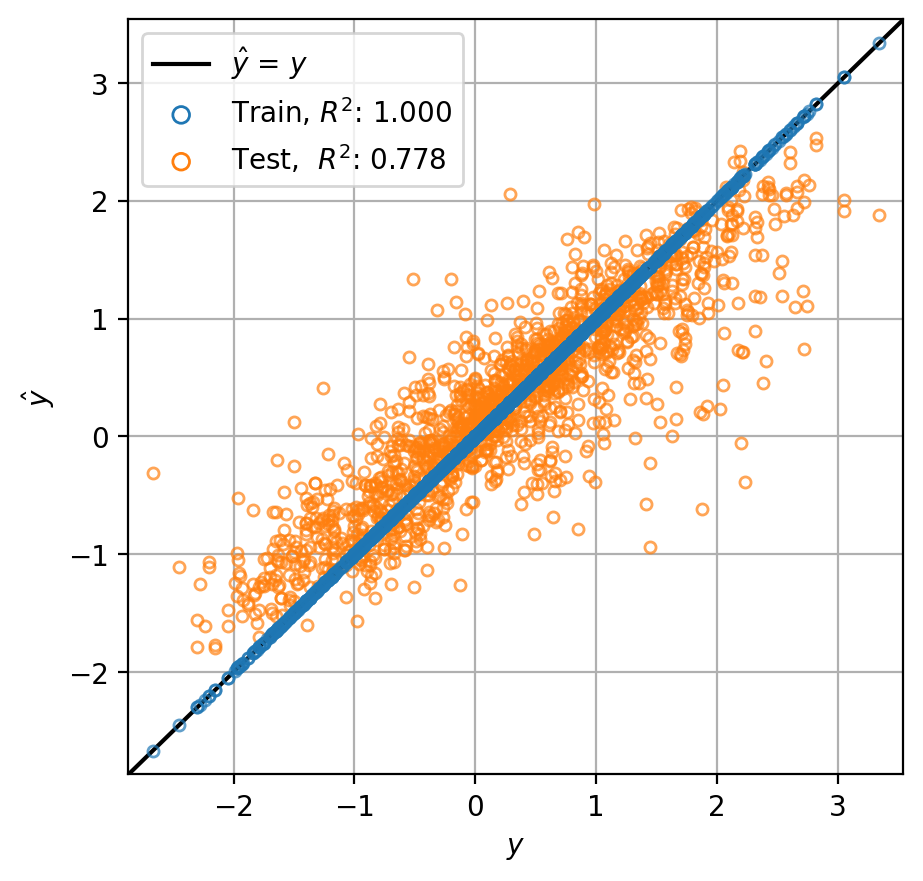

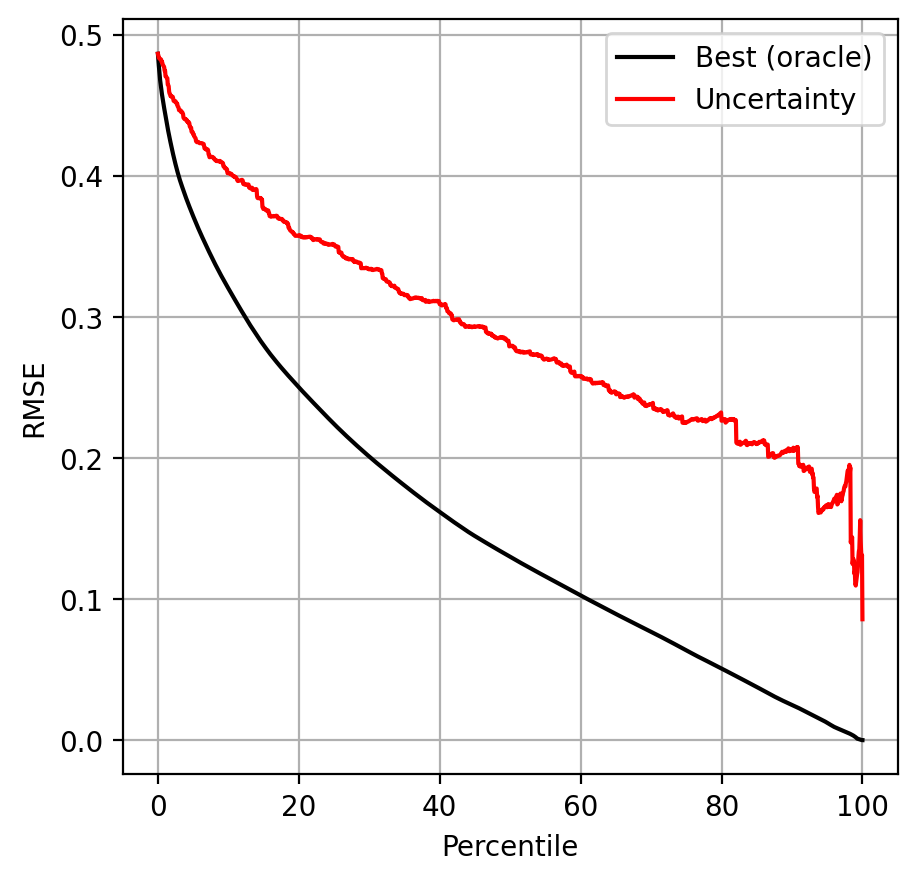

In [8]:
tetrah_cddd, tetrah_y = load_data_set('tetrahymena', 'cddd')
dt_100_evaluator = RegressionEvaluator(model=DecisionTreeRegressor(), repetitions=100, n_splits=2, verbose=False)
dt_100_evaluator.perform(tetrah_cddd, tetrah_y)
plot_r2(dt_100_evaluator)
plot_confidence(dt_100_evaluator)
print(f'AUCO: {auco_area(dt_100_evaluator):.3f}')

RandomForestRegressor

100%|██████████| 100/100 [27:16<00:00, 16.37s/it]


AUCO: 238.538


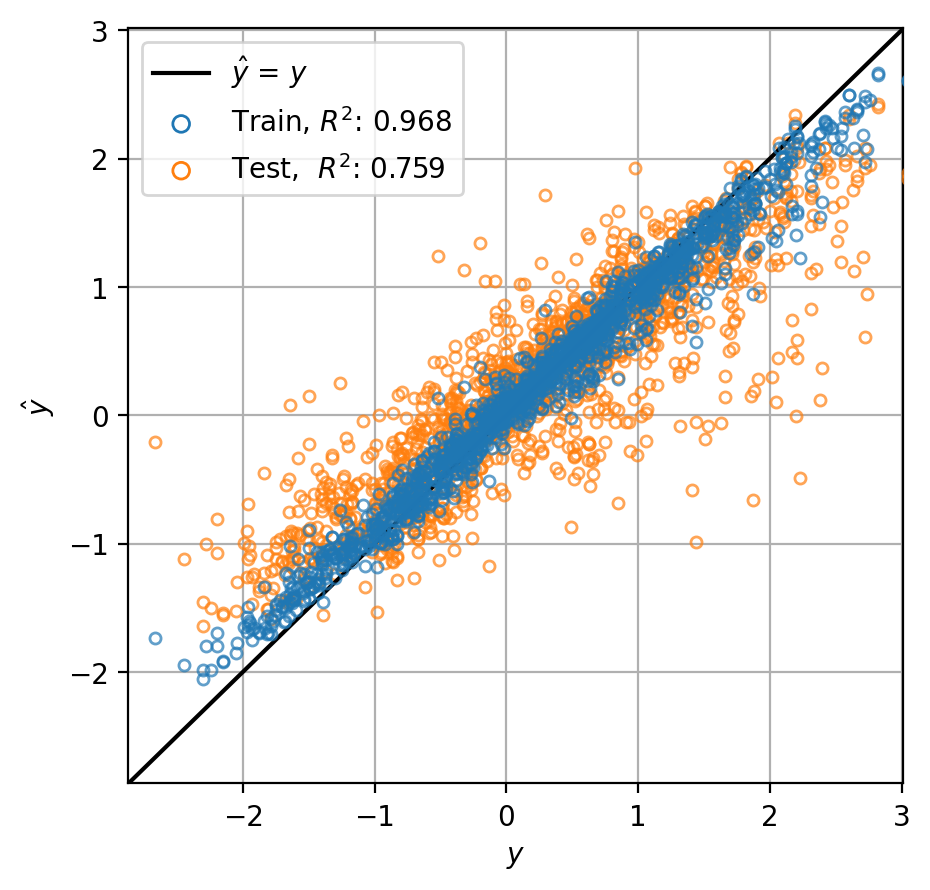

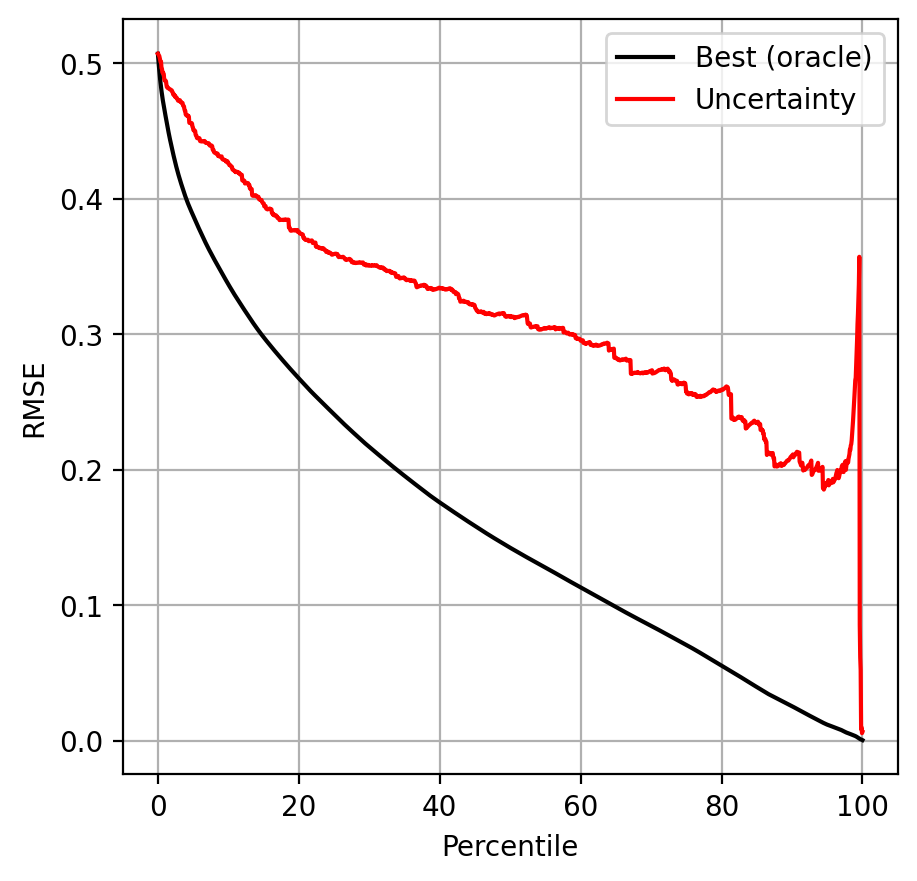

In [9]:
tetrah_cddd, tetrah_y = load_data_set('tetrahymena', 'cddd')
rf_100_evaluator = RegressionEvaluator(model=RandomForestRegressor(), repetitions=100, n_splits=2, verbose=False)
rf_100_evaluator.perform(tetrah_cddd, tetrah_y)
plot_r2(rf_100_evaluator)
plot_confidence(rf_100_evaluator)
print(f'AUCO: {auco_area(rf_100_evaluator):.3f}')